(40, 3, 8)
(40, 3, 8)
(40, 3, 8)
(40, 3, 8)
(40, 3, 8)
(40, 3, 8)


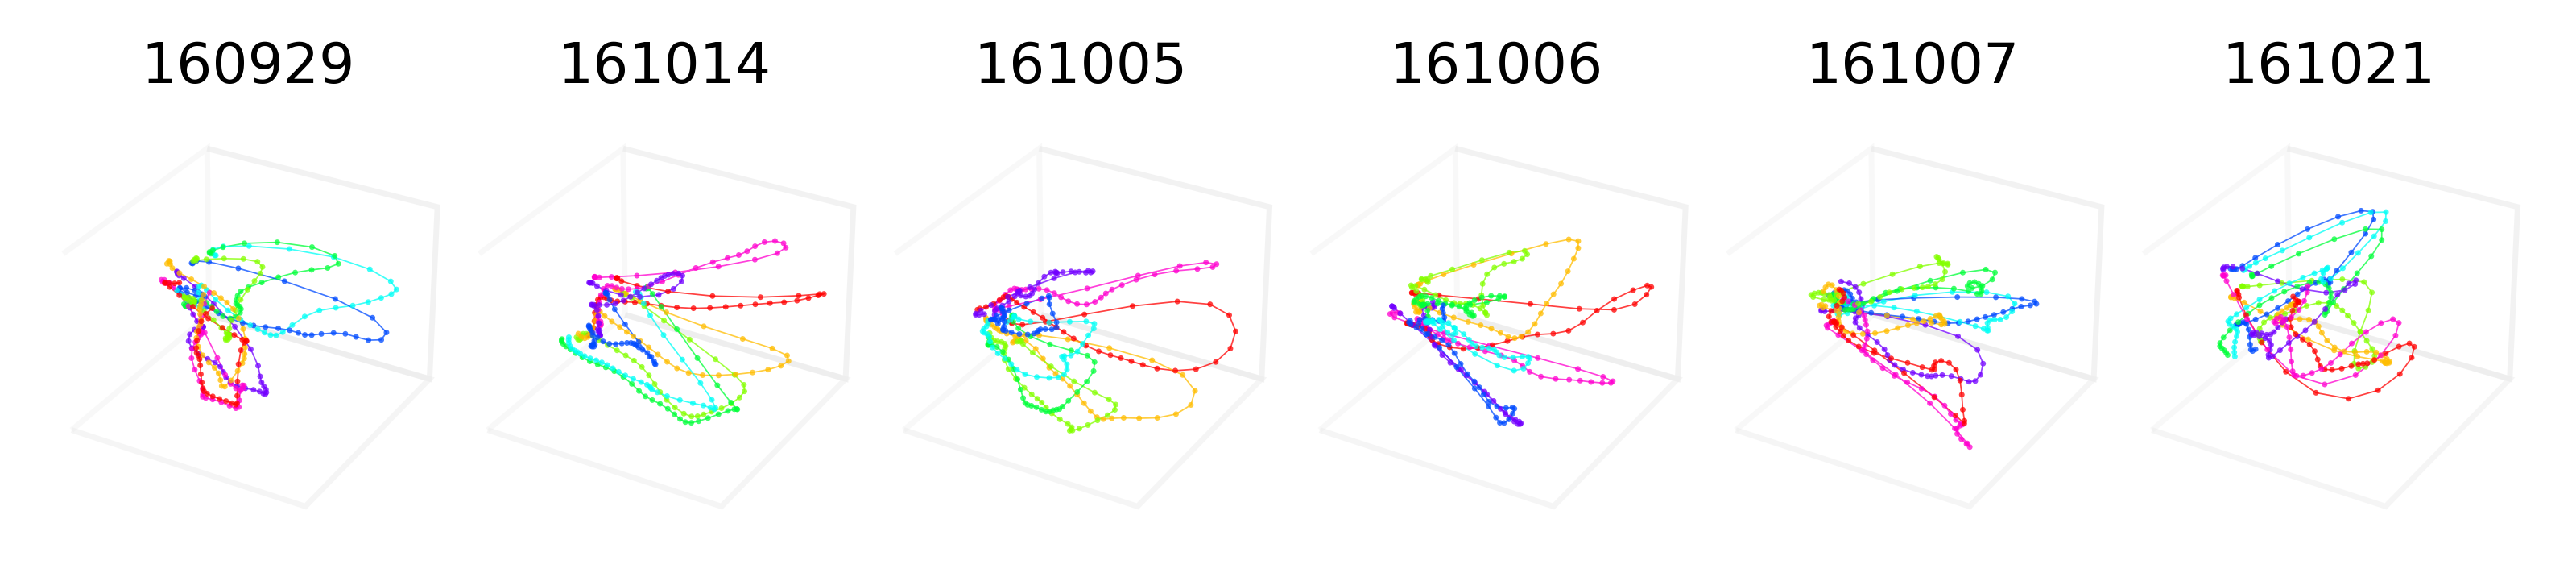

In [1]:
import os, re
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import orthogonal_procrustes

dur = 40
emb_dim = 3
N_angles = 8
name_range = slice(-19, -13)
idx1, idx2, idx3 = 0, 1, 2

directory = './data_NER/M1 4+6+6/PCA_Chewie2016/NPZ/'
files = [os.path.join(directory, f) for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]
n_file = len(files)
def list_and_sort_files(directory):
    files = [os.path.join(directory, f) for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]
    def extract_date(filename):
        # This regex matches 6 consecutive digits that likely represent a date in YYMMDD format
        match = re.search(r'(\d{6})', os.path.basename(filename))
        date = match.group(0) if match else '000000'  # Default to '000000' if no date is found
        # Standardize to YYMMDD if necessary
        year_prefix = '20'  # assuming all dates are after the year 2000
        return int(year_prefix + date) if len(date) == 6 else int(date)
    sorted_files = sorted(files, key=extract_date)
    return sorted_files
sorted_files=list_and_sort_files(directory)
##print("Reading file sequence:", sorted_files)

fig = plt.figure(figsize=(8, 2), dpi=500)
emb_avg_4D = np.zeros((dur, emb_dim, N_angles, n_file))
for f, file in enumerate(sorted_files):
    data_single_session = np.load(file)
    emb_A = data_single_session['cebra_veldir_train']
    emb_A = np.transpose(emb_A, (1, 2, 0))
    XYTarget_A = data_single_session['continuous_index_train']//45
    print(emb_A.shape)
    ax = fig.add_subplot(1, n_file, f + 1, projection='3d')
    plt.subplots_adjust(wspace=0)
    for i in range(N_angles):
        trial_avg = emb_A[:, :, i]
        emb_avg_4D[:, :, i, f] = trial_avg
        ax.scatter(trial_avg[:, idx1],trial_avg[:, idx2],trial_avg[:, idx3],
                   color=plt.cm.hsv(1 / N_angles * i),edgecolors='none',alpha=0.75,s=1)
        ax.plot(trial_avg[:, idx1], trial_avg[:, idx2],trial_avg[:, idx3],
            color=plt.cm.hsv(1 / N_angles * i),linewidth=0.25, alpha=0.75)
        ax.set_title(file[name_range], fontsize=10)
        ax.set_facecolor('white')  # Set the background color to white
        ax.grid(False)             # Remove the grid
        ax.xaxis.pane.fill = False # Remove the background panes
        ax.yaxis.pane.fill = False
        ax.zaxis.pane.fill = False
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_zticks([])
        ax.xaxis.line.set_color((1.0, 1.0, 1.0, 0.0)) # Remove the axis lines
        ax.yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
        ax.zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
        ax.xaxis.line.set_linewidth(0)   
plt.savefig('./NER_Figs_pdf/Fig3/PCA_embeddings_Chewie2016.pdf')

(40, 3, 8)
(40, 3, 8)
(40, 3, 8)
(40, 3, 8)


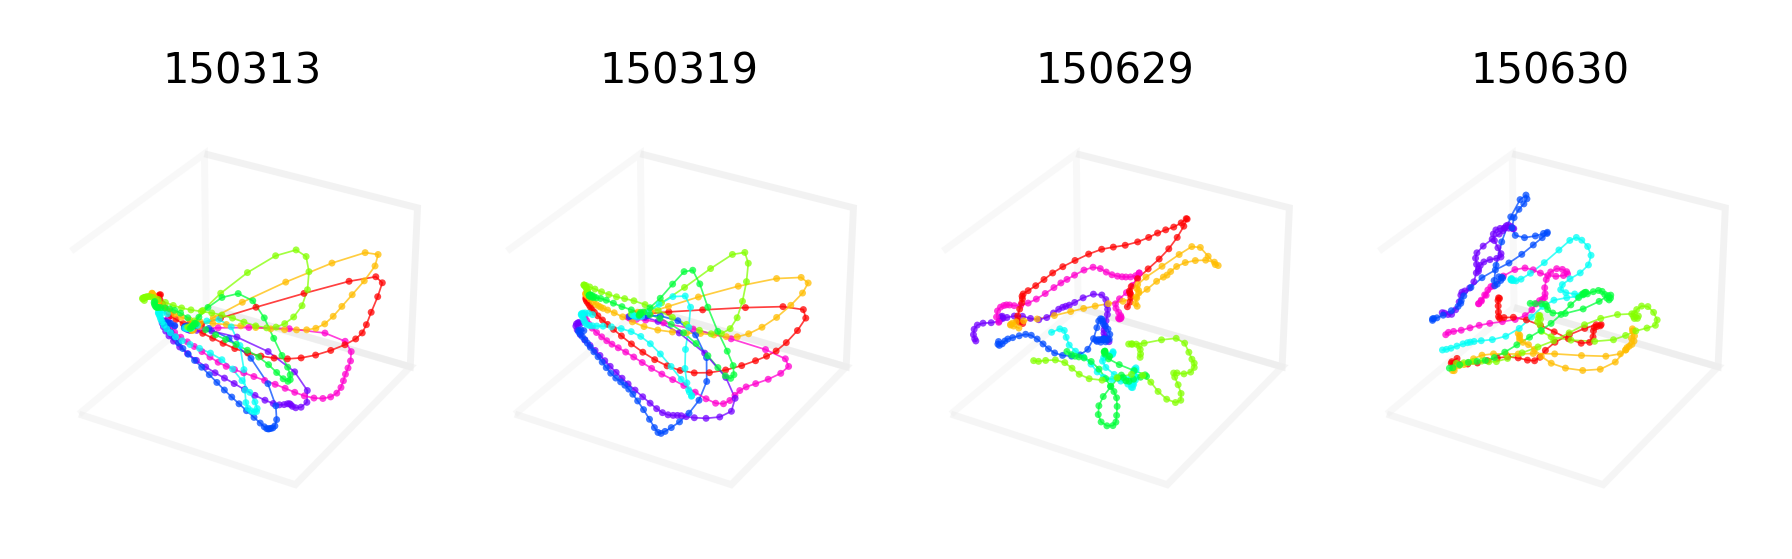

In [2]:
directory = './data_NER/M1 4+6+6/PCA_Chewie2015/NPZ/'
files = [os.path.join(directory, f) for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]
n_file = len(files)
sorted_files=list_and_sort_files(directory)
fig = plt.figure(figsize=(4.5, 1), dpi=500)
emb_avg_4D = np.zeros((dur, emb_dim, N_angles, n_file))
for f, file in enumerate(sorted_files):
    data_single_session = np.load(file)
    emb_A = data_single_session['cebra_veldir_train']
    emb_A = np.transpose(emb_A, (1, 2, 0))
    XYTarget_A = data_single_session['continuous_index_train']//45
    print(emb_A.shape)
    ax = fig.add_subplot(1, n_file, f + 1, projection='3d')
    plt.subplots_adjust(wspace=0)
    for i in range(N_angles):
        trial_avg = emb_A[:, :, i]
        emb_avg_4D[:, :, i, f] = trial_avg
        ax.scatter(trial_avg[:, idx1],trial_avg[:, idx2],trial_avg[:, idx3],
                   color=plt.cm.hsv(1 / N_angles * i),edgecolors='none',alpha=0.75,s=1)
        ax.plot(trial_avg[:, idx1], trial_avg[:, idx2],trial_avg[:, idx3],
            color=plt.cm.hsv(1 / N_angles * i),linewidth=0.25, alpha=0.75)
        ax.set_title(file[name_range], fontsize=6)
        ax.set_facecolor('white')  # Set the background color to white
        ax.grid(False)             # Remove the grid
        ax.xaxis.pane.fill = False # Remove the background panes
        ax.yaxis.pane.fill = False
        ax.zaxis.pane.fill = False
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_zticks([])
        ax.xaxis.line.set_color((1.0, 1.0, 1.0, 0.0)) # Remove the axis lines
        ax.yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
        ax.zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
        ax.xaxis.line.set_linewidth(0)   
plt.savefig('./NER_Figs_pdf/Fig3/PCA_embeddings_Chewie2015.pdf')